## Face Similarity Matching, the basis our our Face Classifier

In this section, we will load a pre-trained model of VGGFace (trainined on thousands of faces) and use it, together with a similarity metric, to define whether two faces are of the same person

In [1]:
# Import our libaries
from keras.models import Model, Sequential
from keras.layers import Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from PIL import Image
import numpy as np
from keras.preprocessing.image import load_img, save_img, img_to_array
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing import image
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Define our VGGFace Model

In [2]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

## Load out VGG Face Weights

In [3]:
#you can download the pretrained weights from the following link 
#https://drive.google.com/file/d/1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo/view?usp=sharing
#or you can find the detailed documentation https://sefiks.com/2018/08/06/deep-face-recognition-with-keras/

from keras.models import model_from_json
model.load_weights('vgg_face_weights.h5')

## Define our very important findCosineSimilarity function.
We also load our findEuclideanDistance() function and will show the distance metric used to create a similarity score between the faces under comparison 

In [4]:
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

def findCosineSimilarity(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))


vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

## Define our verifyFace function where we load to images of faces and compare them.

We set **epsilon** to be the threshold of whether our two faces are the same person. Setting a lower value makes it more strict with our face matching.

In [36]:
epsilon = 0.35

def verifyFace(img1, img2):
    img1_representation = vgg_face_descriptor.predict(preprocess_image('./training_faces/%s' % (img1)))[0,:]
    img2_representation = vgg_face_descriptor.predict(preprocess_image('./training_faces/%s' % (img2)))[0,:]
    
    cosine_similarity = findCosineSimilarity(img1_representation, img2_representation)
    
    f = plt.figure()
    f.add_subplot(1,2, 1)
    plt.imshow(image.load_img('./training_faces/%s' % (img1)))
    plt.xticks([]); plt.yticks([])
    f.add_subplot(1,2, 2)
    plt.imshow(image.load_img('./training_faces/%s' % (img2)))
    plt.xticks([]); plt.yticks([])
    plt.show(block=True)
    
    print("Cosine similarity: ",cosine_similarity)
    
    if(cosine_similarity < epsilon):
        print("They are same person")
    else:
        print("They are not same person!")

## Let's a run a few tests

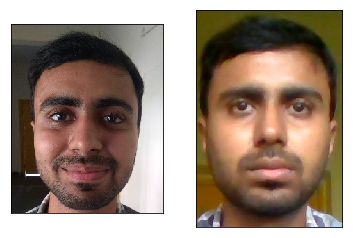

Cosine similarity:  0.18595463037490845
They are same person


In [38]:
verifyFace("ravii.jpg", "match.jpg")

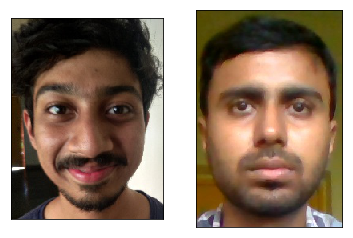

Cosine similarity:  0.37167268991470337
They are not same person!


In [39]:
verifyFace("hariS.jpg", "match.jpg")

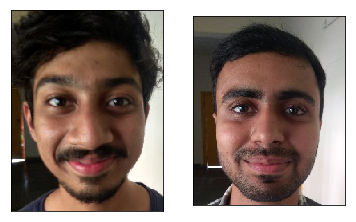

Cosine similarity:  0.36582082509994507
They are not same person!


In [40]:
verifyFace("hariS.jpg", "ravii.jpg")

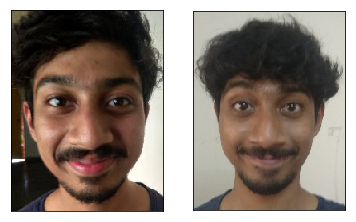

Cosine similarity:  0.12987911701202393
They are same person


In [54]:
verifyFace("hariS.jpg", "h11.jpg")

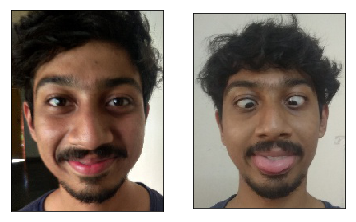

Cosine similarity:  0.16411960124969482
They are same person


In [55]:
verifyFace("hariS.jpg", "h22.jpg")

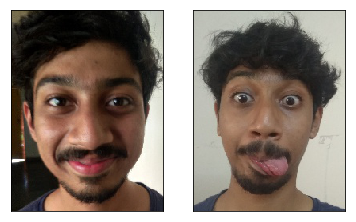

Cosine similarity:  0.23740673065185547
They are same person


In [57]:
verifyFace("hariS.jpg", "h33.jpg")

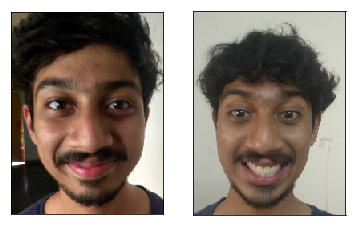

Cosine similarity:  0.11417627334594727
They are same person


In [59]:
verifyFace("hariS.jpg", "h44.jpg")

In [51]:
h1=cv2.imread("h1.jpg")
h2=cv2.imread("h2.jpg")
h3=cv2.imread("h3.jpg")
h4=cv2.imread("h4.jpg")

In [52]:
h1=cv2.resize(h1,(0,0),fx=0.16,fy=0.16)
cv2.imwrite("h11.jpg",h1)

True

In [53]:
h2=cv2.resize(h2,(0,0),fx=0.16,fy=0.16)
cv2.imwrite("h22.jpg",h2)

True

In [56]:
h3=cv2.resize(h3,(0,0),fx=0.16,fy=0.16)
cv2.imwrite("h33.jpg",h3)

True

In [58]:
h4=cv2.resize(h4,(0,0),fx=0.16,fy=0.16)
cv2.imwrite("h44.jpg",h4)

True

In [10]:
import cv2

In [20]:
ra=cv2.imread("ravi.jpg")

In [21]:
ra.shape

(2729, 2198, 3)

In [22]:
ra=cv2.resize(ra,None,(0,0),fx=0.1,fy=0.1)

In [23]:
ra.shape

(273, 220, 3)

In [24]:
a=cv2.imread("angelina.jpg")

In [25]:
a.shape

(290, 290, 3)

In [26]:
cv2.imwrite("ravii.jpg",ra)

True

In [30]:
ha=cv2.imread("hari.jpg")

In [31]:
ha.shape

(3163, 2384, 3)

In [32]:
ha=cv2.resize(ha,None,(0,0),fx=0.08,fy=0.08)

In [33]:
ha.shape

(253, 191, 3)

In [34]:
cv2.imwrite("hariS.jpg",ha)

True